# Under- and overfitting, model selection

## Preliminaries

In the first set of exercises you had to implement the training and evaluation of the linear regression and $k$-NN methods from scratch in order to practice your `numpy` skills. From this set of exercises onward, you can use the implementations provided in `scikit-learn` or other higher-level libraries. We start this set of exercises by demonstrating some of the features of `scikit-learn`.

For example, implementation of linear regression model fitting with an analytical solution for the parameters is provided by the class `sklearn.linar_model.LinearRegression`. You can train a linear regression model in the following way:

In [2]:
import numpy as np
from sklearn import datasets, linear_model

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# use only one feature
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# create linear regression object
model = linear_model.LinearRegression()

# train the model using the training dataset
model.fit(X_train, y_train)

LinearRegression()

Let's visualize the training dataset and the learned regression model.

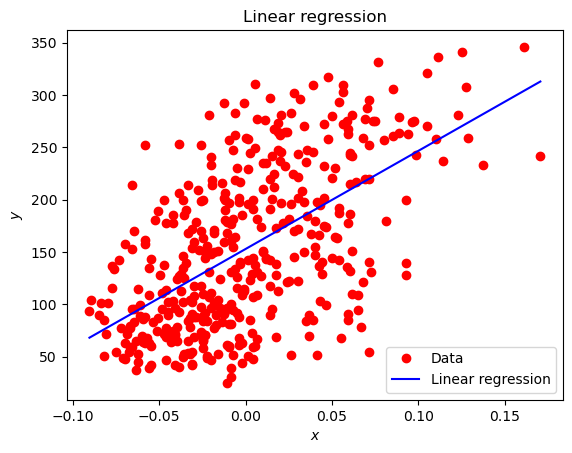

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(X_train, y_train, 'r.', markersize=12)
X_edge = np.array([np.min(X_train, 0), np.max(X_train, 0)])
plt.plot(X_edge, model.predict(X_edge), 'b-')
plt.legend(('Data', 'Linear regression'), loc='lower right')
plt.title('Linear regression')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Once trained, the model can be used to make predictions on the test data:

In [3]:
# Make predictions using the testing dataset
prediction = model.predict(X_test)

The next step (not shown here) is to evaluate the performance of the trained model.

Note that the `scikit-learn` interface works by first initializing an object from the class that implements the machine learning model (linear regression in this case) and then fitting the initialized model using the data in the training set. Finally, the trained (fitted) model can be used to make predictions on unseen data. In fact, all models implemented in this library follow the same *initialize-fit-predict* programming interface. For example, a $k$-NN classifier can be trained in the following way:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors

breast_cancer = datasets.load_breast_cancer()
diabetes = datasets.load_diabetes()

X = breast_cancer.data
y = breast_cancer.target

# make use of the train_test_split() utility function instead
# of manually dividing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

# initialize a 3-NN classifier
model = neighbors.KNeighborsClassifier(n_neighbors=3)

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)

Note that the features in the breast cancer dataset have different scales (some have on average very small absolute values, and some very large), which means that the distance metric used by $k$-NN will me dominated by the features with large values. You can use any of the number of feature transformation methods implemented in `scikit-learn` to scale the features. For example, you can use the `sklearn.preprocessing.StandardScaler` method to transform all features to a have a zero mean and unit variance:

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

The scaler has its own parameters which are the means and standard deviations of the features estimated from the training set. If you train a model with the scaled features, you will have to remember to also apply the scaling transformation every time you make a prediction on new unseen and unscaled data. This is somewhat prone to error. One option for making the code more robust is to create a processing pipeline that includes the scaling and $k$-NN models in a sequence:

In [8]:
from sklearn.pipeline import Pipeline

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

model = Pipeline([
                 ("scaler", scaler),
                 ("knn", knn)
                ])

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)


If you are curious, more information about the design of the `scikit-learn` application programming interface (API) can be found [in this paper](https://arxiv.org/pdf/1309.0238.pdf). 

## Exercises

#### Initialization of dataset variables

In [3]:
from sklearn.model_selection import train_test_split

from sklearn import datasets

from sklearn.datasets import load_diabetes, load_breast_cancer

breast_cancer = datasets.load_breast_cancer()
diabetes = datasets.load_diabetes()

# create train and test datasets for the breast cancer dataset
X_bc = breast_cancer.data
y_bc = breast_cancer.target

#X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X, y, stratify=y, random_state=40)
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, stratify=y_bc, random_state=40)

# create train and test
# datasets for the diabetes dataset
X_diabetes = diabetes.data
y_diabetes = diabetes.target

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, random_state=40)

In [4]:
import sys
sys.path.append('code/')


### Bias-variance decomposition

Show that the mean squared error of the estimate of a parameter can be decomposed into an expression that includes both the bias and variance (Eq. 5.53-5.54 in "Deep learning" by Goodfellow et al.). 

#### Answer

### Polynomial regression

For this exercise we will be using generated data to better show the effects of the different polynomial orders.
The data is created using the make_polynomial_regression function.

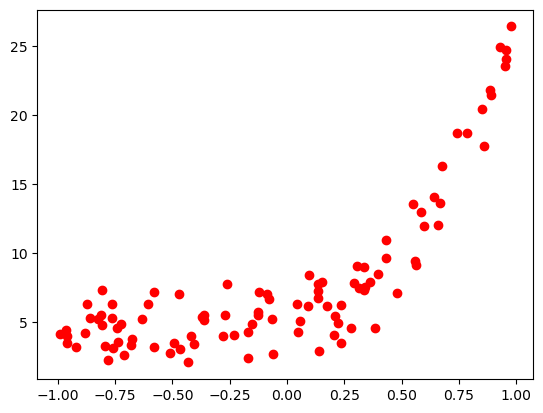

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def generate_dataset(n=100, degree=1, noise=1, factors=None):
    # Generates a dataset by adding random noise to a randomly
    # generated polynomial function.
    
    x = np.random.uniform(low=-1, high=1, size=n)
    
    factors = np.random.uniform(0, 10, degree+1)
    
    y = np.zeros(x.shape)
    
    for idx in range(degree+1):
        y += factors[idx] * (x ** idx)

    # add noise
    y += np.random.normal(-noise, noise, n)
    
    return x, y

# load generated data
np.random.seed(0)

X, y = generate_dataset(n=100, degree=4, noise=1.5)

plt.plot(X, y, 'r.', markersize=12)

Implement polynomial regression using the `sklearn.preprocessing.PolynomialFeatures` transformation. Using the `sklearn.grid_search.GridSearchCV` class, perform a grid search of the polynomial order hyperparameter space with cross-validation and report the performance on an independent test set.

Plot a learning curve that show the validation accuracy as a function of the polynomial order. 

<p><font color='#770a0a'>Which models have a high bias, and which models have high variance? Motivate your answer.</font><p>
    
Repeat this experiment, this time using the diabetes dataset instead of the generated data.

#### Introduction/Explanation of code

#### Results & Discussion

### ROC curve analysis
A common method to evaluate binary classifiers is the receiver operating characteristic (ROC) curve. Similar to the week one practicals, implement a $k$-NN classifier on the breast cancer dataset, however, his time use the $k$-NN pipeline from the preliminary. Train the model for different values of $k$ and evaluate their respective performance with an ROC curve, use the `sklearn.metrics.roc_curve` function.

#### Introduction/ Explanation of code

For k-NN, the predicted class can be treated as a probability by calculating the proportion of neighbors belonging to each class. By varying the threshold for classifying a sample as positive, different confusion matrices can be generated, resulting in varying True Positive Rate (TPR) and False Positive Rate (FPR) values, which can then be used to generate a ROC curve.

The ROC curve plots the TPR against the FPR as the threshold changes. TPR, also known as sensitivity, can be calculated as: 
$$\text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

In our dataset, the true positives are the samples correctly classified as malignant, while the false negatives are the malignant samples incorrectly classified as benign. Thus, TPR indicates the proportion of malignant samples correctly classified.
FPR can also be viewed as $1 - Specificity$ and is calculated as:
$$\text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}$$

In our dataset, false positives are benign samples incorrectly classified as malignant, and true negatives are benign samples correctly classified. Hence, FPR shows the proportion of benign samples that are incorrectly classified.

Depending on the clinical context, we might prefer different trade-offs. For example, we might choose a threshold that maximizes sensitivity (even if it increases FPR) to ensure that no malignant cases are missed. Conversely, in other scenarios, balancing sensitivity with specificity (i.e., $1- \text{FPR}$) might be preferred to reduce false positives.

The pipeline, incorporating scaling and the $k$-NN model as described in the preliminaries, was utilized as the estimator for `GridSearchCV` to develop the model. A 10-fold cross-validation was conducted with a fixed random state to ensure reproducibility. Although manually iterating through different values of $k$
without using `GridSearchCV` is feasible, this approach was selected to produce a more robust and adaptable code that can be applied to other analyses.

An ROC curve was generated for each value of $k$, with the corresponding False Positive Rate (FPR), True Positive Rate (TPR), and thresholds reported.

Additionally, to evaluate the overall performance of the classifiers, we can calculate the area under the ROC curve (AUC). An AUC of 1.0 indicates a perfect classifier, while an AUC of 0.5 suggests that the classifier performs no better than random chance and has no ability to distinguish between positive and negative classes. In GridSearchCV, the scoring was set to 'roc_auc' for this analysis.

In [10]:
from knn_roc import *
model_grid, cv_results = create_and_train_knn_pipeline(X_bc_train, y_bc_train, param_grid={'knn__n_neighbors':[i for i in range(1,16,2)]}, n_cv=10, random_state=40)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002066,0.000297,0.009574,0.003887,1,{'knn__n_neighbors': 1},0.931713,0.950231,0.918981,0.950231,0.906250,0.968750,0.966667,0.961538,0.867788,0.96875,0.939090,0.031454,8
1,0.001301,0.000510,0.005110,0.000582,3,{'knn__n_neighbors': 3},0.944444,0.950231,0.944444,0.976852,0.934028,0.968750,0.997531,0.997596,0.986779,1.00000,0.970066,0.023959,7
2,0.001156,0.000319,0.005361,0.000369,5,{'knn__n_neighbors': 5},0.945602,0.956019,0.990741,0.995370,0.967593,0.998843,1.000000,0.993990,0.985577,1.00000,0.983373,0.018794,6
3,0.001624,0.000574,0.005058,0.000674,7,{'knn__n_neighbors': 7},0.943287,0.988426,0.998843,0.993056,0.964120,0.998843,1.000000,0.991587,0.983173,1.00000,0.986133,0.017663,5
4,0.001873,0.000459,0.005870,0.001004,9,{'knn__n_neighbors': 9},0.957176,0.984954,0.998843,0.996528,0.966435,0.996528,1.000000,0.997596,0.980769,1.00000,0.987883,0.014559,4
5,0.001759,0.000465,0.005528,0.000521,11,{'knn__n_neighbors': 11},0.959491,0.986111,1.000000,0.997685,0.962963,0.997685,1.000000,0.997596,0.983173,1.00000,0.988470,0.014751,3
6,0.001679,0.000569,0.006026,0.000835,13,{'knn__n_neighbors': 13},0.959491,0.984954,1.000000,0.997685,0.961806,0.998843,1.000000,0.998798,0.984375,1.00000,0.988595,0.015092,2
7,0.001961,0.000339,0.006372,0.000476,15,{'knn__n_neighbors': 15},0.986111,0.980324,1.000000,0.997685,0.959491,1.000000,1.000000,1.000000,0.980769,1.00000,0.990438,0.012969,1


n_neighbors=1
   False Positive Rate (FPR)  True Positive Rate (TPR)  Thresholds
0                   0.000000                  0.000000         inf
1                   0.037736                  0.966667         1.0
2                   1.000000                  1.000000         0.0
------------------------------------------------------------
n_neighbors=3
   False Positive Rate (FPR)  True Positive Rate (TPR)  Thresholds
0                   0.000000                  0.000000         inf
1                   0.000000                  0.877778    1.000000
2                   0.037736                  1.000000    0.666667
3                   0.132075                  1.000000    0.333333
4                   1.000000                  1.000000    0.000000
------------------------------------------------------------
n_neighbors=5
   False Positive Rate (FPR)  True Positive Rate (TPR)  Thresholds
0                   0.000000                  0.000000         inf
1                   0.000000    

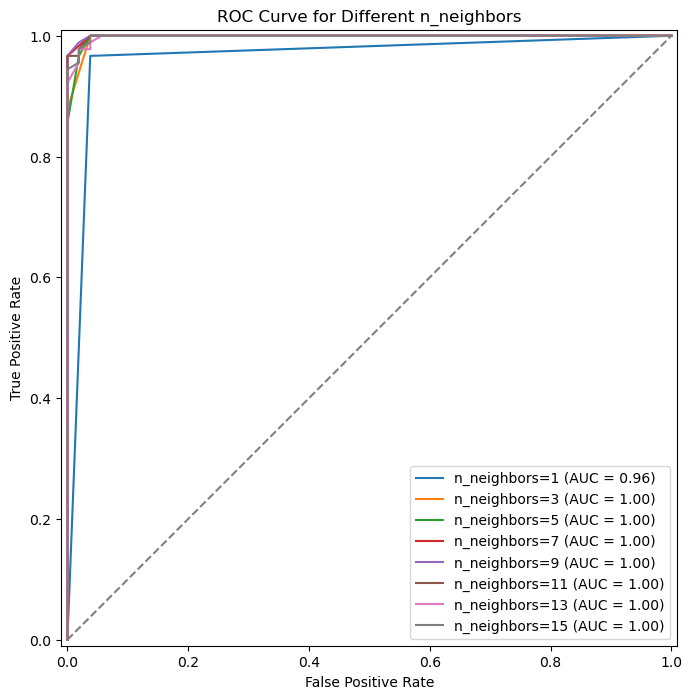

In [12]:
# Call the function to plot ROC curves and visualize thresholds
plot_roc(model_grid, X_bc_train, y_bc_train, X_bc_test, y_bc_test)

#### Results & Discussion

### $F_1$ score and Dice similarity coefficient

The Dice similarity coefficient is a very popular evaluation measure for image segmentation applications. Assuming that $A$ is the ground truth segmentation of an object represented as a binary image, and $B$ is the binary output of an image segmentation method, the Dice similarity coefficient is computed as:

$\text{Dice}(A,B) = \frac{2|A\cap B|}{|A| + |B|}$

where $|\cdot|$ represents the cardinality of the objects (e.g. $|A|$ is the number of non-zero pixels in the ground truth segmentation).

For example, the Dice similarity can be computed in the following way:

0.3402777777777778


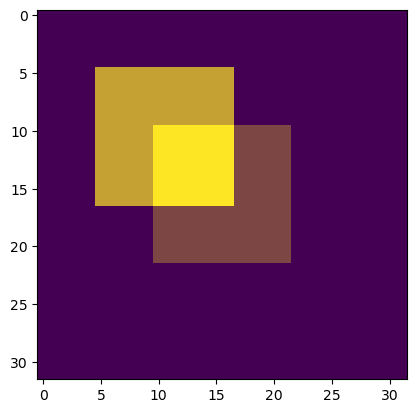

In [18]:
# generate some test objecys
A = np.zeros((32, 32))
A[10:-10, 10:-10] = 1
B = np.zeros((32, 32))
B[5:-15, 5:-15] = 1

dice = 2*np.sum(A*B)/(np.sum(A)+np.sum(B))

# display the results
plt.plot()
plt.imshow(A)
plt.imshow(B, alpha=0.7)

print(dice)

<p><font color='#770a0a'>Show that the $F_1$ score, which is the harmonic mean of precision and recall, is equivalent to the Dice similarity coefficient</font><p>

#### Introduction/Explanation of code

#### Results & Discussion